# Introduction

Suppose, you work for some big bank in credits department. Every day your bank receives applications for loan. You want to check if the applicant is the right person to give loan. You appoint several workers for viewing their applications and rate the applicants based on their application information in range from 0 to 100.<br>
0: Not a good person<br>
100: Absolutely, best person for loan. Immediately, give this person loan.<br>
Your workers are doing good, giving good results. However, the number of applications is increasing day by day and you want to rate the applicants automatically. What you will do? You can use ML algorithm here. BUT, before doing that you need to convert your business needs into ML jargon. If you have historical data on defaults, your algorithm can "learn" from that defaults. This is called **Supervised Learning**.

In supervised learning, obviously, your ML algorithm needs some supervision or some examples to "learn" from. These examples are called **targets** (`Independant Variable` in a Statistical Term). In our example with the bank, examples can be historical defaults. Most of the time **targets** are denoted with `y` letter. But, default values alone cannot help your ML algorithm. We need also, some characteristics of that default values. For example, `income`, `age` and `sex` of people who could not pay the loan back. These characteristics are often called as `features` and denoted with `x`. If you have multiple features, then you can write them as `x1`, `x2` and so on.

Now, you have almost everything that you can use to train ML algorithm.

## Practice

- Since last year, the shop floor productivity has been reduced because of the increase in machine breakdowns. Our goal is to increase overall productivity by reducing machine breakdowns by 30%.
- Determine the probability of a person having heart-related problems without the need to visit the hospital.
- A bank is receiving 20 complaints regarding unauthorized online transactions. They want to eliminate the unauthorized transaction and are ready to accept if this implementation increases the transaction time by 30 seconds.

# Functions

On the one hand you have features and on the other hand you have targets. However, you should connect those two in some way. Here, you need **functions**.

$$f(x) = F(x_1, x_2, ..., x_n)$$

You suppose that you target and features have linear correlation and you design the function like below:<br>
$$ \large f(x) = \sum_{i=0}^m w_i x_{i}$$
where: <br>
- $x_0 = 1$
- $y \approx f(x)$
- $x_n$ is our features
- $w_n$ is unknown and we need to find them

# OLS (Ordinary Least Squares)

You have `y` - your targets and `f(x)` - some function you need to model the true values `y`. In this case, we  should also need to find how close the true function of `y` to our function `f(x)`. For example, like this: $|y - f(x)|$. We need that the difference is as small as possible, so, we should optimize $|y - f(x)|$ and in ML therms, that functions is called **Optimization Function** (Cost Function, Loss Function). But it is somehow less informative, we will use `Mean Squared Error` function instead.

$$\begin{split}\Large \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 
\end{array}\end{split} $$

### What you understand by optimization?

We need to find a point (value) where our Loss Function will be minimum.

### How we do that?

By taking derivetive of the Loss Function and making it equal to 0.

## Analytical way of optimizing

$$\begin{split}\Large \begin{array}{rcl}\mathcal{L}\left(\textbf X, \textbf{y}, \textbf{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \textbf{w}^\text{T} \textbf{x}_i\right)^2 \\
&=& \frac{1}{2n} \left\| \textbf{y} - \textbf X \textbf{w} \right\|_2^2 \\
&=& \frac{1}{2n} \left(\textbf{y} - \textbf X \textbf{w}\right)^\text{T} \left(\textbf{y} - \textbf X \textbf{w}\right)
\end{array}\end{split}$$

$$\begin{split}\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} &=& \frac{\partial}{\partial \textbf{w}} \frac{1}{2n} \left( \textbf{y}^{\text{T}} \textbf{y} -2\textbf{y}^{\text{T}} \textbf{X} \textbf{w} + \textbf{w}^{\text{T}} \textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) \\
&=& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right)
\end{array}\end{split}$$

$$\begin{split}\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \textbf{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 \textbf{X}^{\text{T}} \textbf{y} + 2\textbf{X}^{\text{T}} \textbf{X} \textbf{w}\right) = 0 \\
&\Leftrightarrow& -\textbf{X}^{\text{T}} \textbf{y} + \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = 0 \\
&\Leftrightarrow& \textbf{X}^{\text{T}} \textbf{X} \textbf{w} = \textbf{X}^{\text{T}} \textbf{y} \\
&\Leftrightarrow& \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}
\end{array}\end{split}$$

We get $ \textbf{w} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}$

In [320]:
from sklearn.datasets import make_regression
import numpy as np

X, y = make_regression(n_samples=100, n_features=2, random_state=42)

In [336]:


# Now we'll add a column of ones to the design matrix.
# This is the feature that corresponds to the intercept parameter
# in the moddel
# X = np.c_[np.ones(X.shape[0]), X]
xT = np.transpose(X)

# Calculate the inverse of xTx using the numpy linear algebra
# functions
xTx_inv = np.linalg.inv(np.matmul(xT, X))
# formula (xTx_inv)*(xT*y).
ols_params = np.matmul(xTx_inv, np.matmul(xT, y))

In [338]:
ols_params

array([-1.46549439e-14,  8.77373072e+01,  7.40768618e+01])

With this approach we have some problems:
- the matrix $(X^TX)^{-1}$ may not exist
- Long computing when we have thousand of features

# Gradient Descent

It is an optimization method and there are a bunch of other optimization methods.

$$w_{i+1} = w_i - \alpha \frac{\partial \mathcal{L}}{\partial \textbf{w}} $$<br>
where<br>
$\alpha$ - learning rate

Derivative sign gives us direction and absolute value gives how far way we are from optimum.

In [298]:
np.random.seed(0)
x = np.linspace(-3, 3, 60)
y = 2.0*x + np.random.normal(0, 0.8, size=x.shape)

def loss_fn(x, y, w):
    '''
    Function to compute the empirical risk.
    x is a 1D numpy array of the feature values,
    y is a 1D numpy array of the response values.
    beta is the model parameter value.
    '''
    # Initialize the risk value
    loss = 0.0
    # Loop over the data an increment the risk with
    # a squared-loss
    for i in range(x.shape[0]):
        loss += np.power(y[i]-(w*x[i]), 2.0)
    loss /= x.shape[0]
    return loss

def gd(x, y, w):
    '''
    Function to compute the derivative of the empirical risk
    with respect to the model parameter.
    x is a 1D numpy array of the feature values,
    y is a 1D numpy array of the response values.
    beta is the model parameter value.
    '''
    derivative_risk = 0.0
    for i in range(x.shape[0]):
        # print(2.0*x[i]*(y[i]-(w*x[i])))
        derivative_risk += - (2.0*x[i]*(y[i]-(w*x[i])))
        # print(derivative_risk)
    derivative_risk /= x.shape[0]
    # print(derivative_risk)
    return derivative_risk
eta = 0.05
n_iter=100
# Initialize arrays to hold the sequence of
# parameter estimates and empirical risk values
d=np.full(1+n_iter, np.nan)
w_learn=np.full(1+n_iter, np.nan)
loss_learn=np.full(1+n_iter, np.nan)
# Set the starting estimate for the
# model parameter
w_learn[0]=1.0
# Iterate using the gradient descent update rule
for iter in range(n_iter):
    
    loss_learn[iter] = loss_fn(x,y,w_learn[iter])
    # w_learn[iter+1] = w_learn[iter]
    d[iter] = gd(x, y, w_learn[iter])
    w_learn[iter+1] = w_learn[iter] - eta*d[iter]

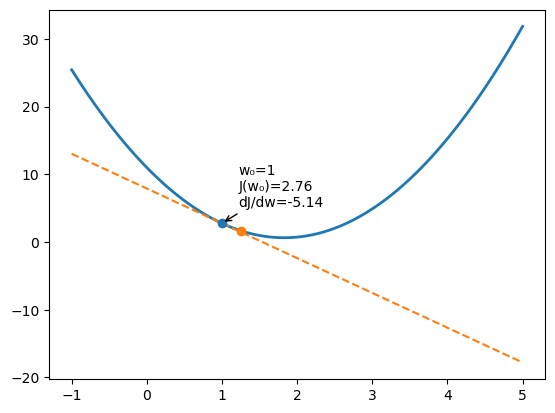

In [300]:
step=0
w_min, w_max = -1.0, 5.0
w_grid = np.linspace(w_min, w_max, 400)
J_grid = np.array([loss_fn(x, y, w) for w in w_grid])
plt.plot(w_grid, J_grid, linewidth=2, label="MSE  J(w)")
tangent = loss_learn[0] + d[0] * (w_grid - 1.0)
plt.plot(w_grid, tangent, linestyle="--")
plt.scatter([w_learn[step]], [loss_learn[step]], zorder=3)
plt.scatter([w_learn[step+1]], [loss_learn[step+1]], zorder=3)
plt.annotate(
    f"w₀={w_learn[step]:.3g}\nJ(w₀)={loss_learn[step]:.3g}\ndJ/dw={d[step]:.3g}",
    (w_learn[step], loss_learn[step]),
    textcoords="offset points",
    xytext=(12, 12),
    arrowprops=dict(arrowstyle="->")
);

[Linear Regression Visualize](https://observablehq.com/@yizhe-ang/interactive-visualization-of-linear-regression)

# Sklearn

In [330]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=False)
lr.fit(X, y)
lr.coef_

array([2.93098879e-15, 8.77373072e+01, 7.40768618e+01])

## Assumptions of Linear Regression

- Linearity: The relationship between independent and dependent variables must be linear.
- Independence of errors: Residuals should be uncorrelated with each other.
- Homoscedasticity: Residuals should have constant variance across all levels of the independent variables. 
- Normality of errors: Residuals should be normally distributed.